# Methods in Data Science - Homework 4 - Fall 2024 - Wilmington College

**Chapter 4: Exercises 13 (except part (j)) and 14**

13. This question should be answered using the `Weekly` data set, which
is part of the `ISLP` package. This data is similar in nature to the
`Smarket` data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of  2010.
- (a) Produce some numerical and graphical summaries of the `Weekly`
data. **Do there appear to be any patterns?**

- (b) Use the full data set to perform a logistic regression with
`Direction` as the response and the five lag variables plus `Volume`
as predictors. Use the summary function to print the results. **Do
any of the predictors appear to be statistically significant? If so,
which ones?**

- (c) Compute the confusion matrix and overall fraction of correct
predictions. **Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.**

- (d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with `Lag2` as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

- (e) Repeat (d) using LDA.

- (f) Repeat (d) using QDA.

- (g) Repeat (d) using KNN with K = 1.

- (h) Repeat (d) using naive Bayes.

- (i) **Which of these methods appears to provide the best results on
this data?**

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit



weekly_df = pd.read_csv('Datasets/Weekly.csv')

In [3]:
# (a) Numerical and graphical summaries

# Numerical summary
numerical_summary = weekly_df.describe()

# Check the counts for 'Direction'
print(weekly_df['Direction'].value_counts())



Direction
Up      605
Down    484
Name: count, dtype: int64


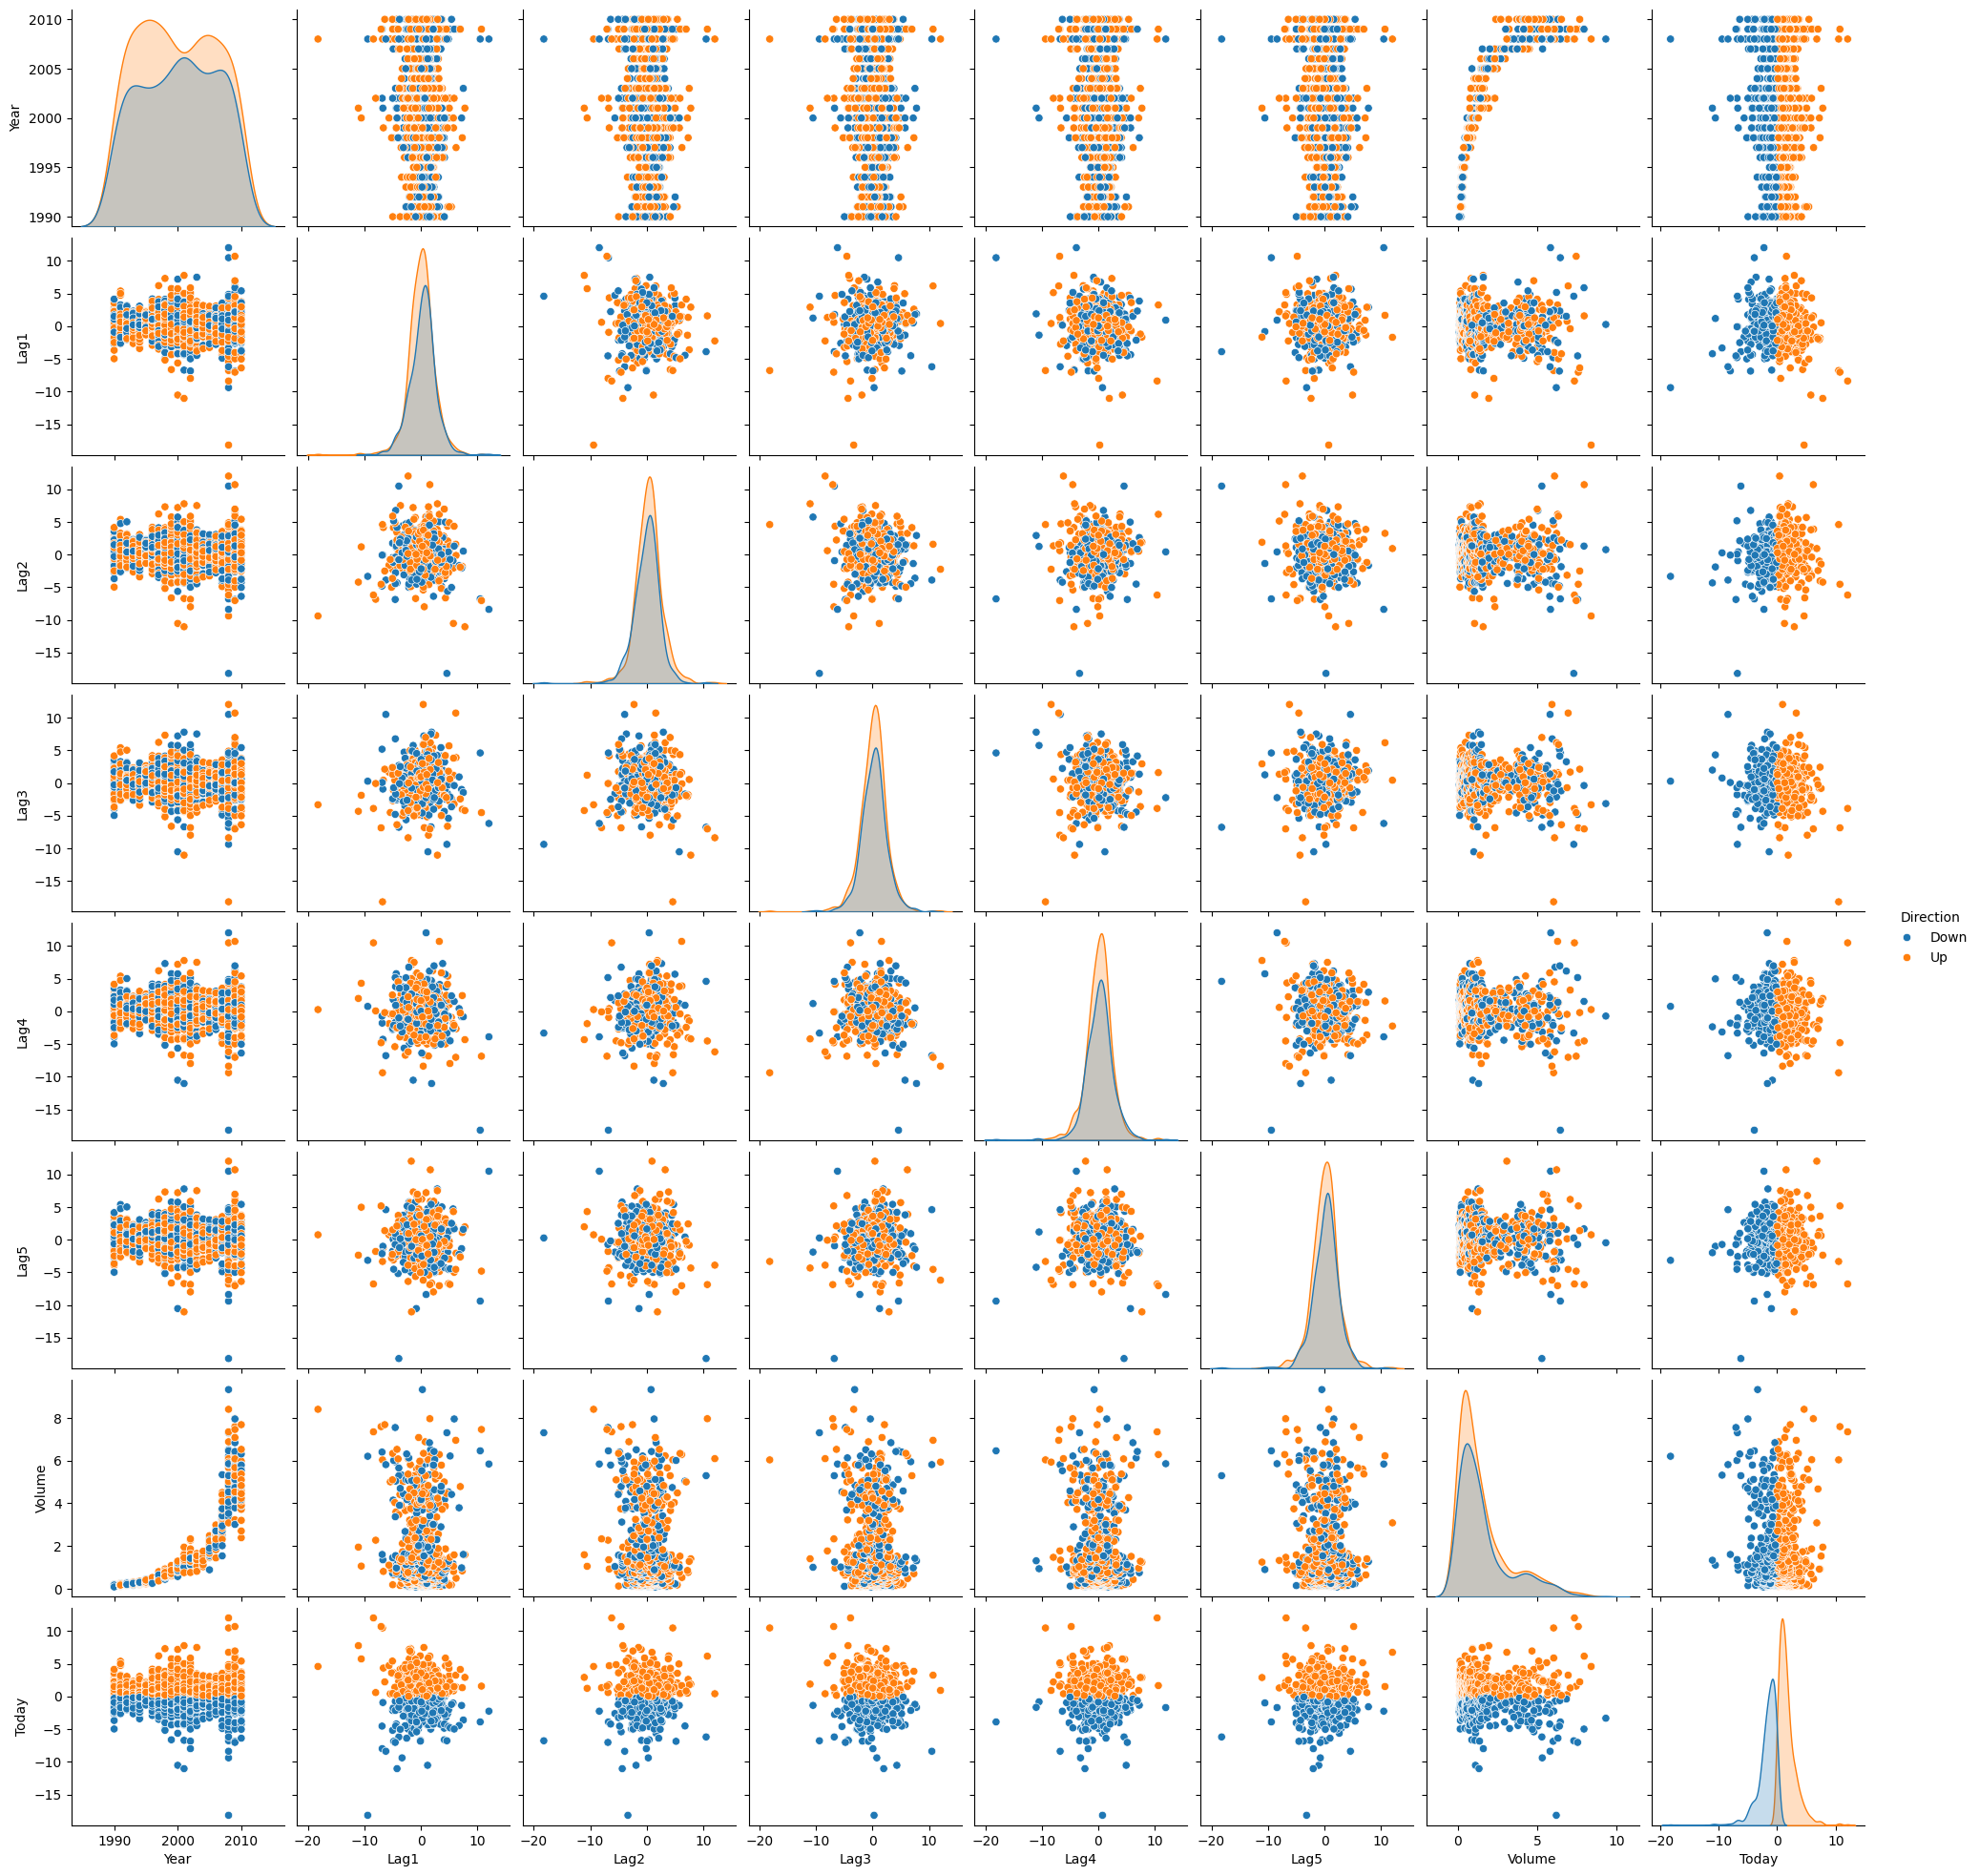

In [4]:
# Visualizing relationships
sns.pairplot(weekly_df, hue="Direction")
plt.show()

In [ ]:
# (b) Logistic Regression on Full Data

# Convert Direction to binary for logistic regression (Up = 1, Down = 0)
weekly_df['Direction_binary'] = weekly_df['Direction'].apply(lambda x: 1 if x == "Up" else 0)

# Define predictors and response
X = weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly_df['Direction_binary']

# Fit logistic regression model
logit_model = Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:               9.505e-05
Time:                        02:49:23   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.

### Answer for (b)

Based on the logistic regression output:

1. **Significant Predictors**: 
   - The `Lag2` and `Volume` predictors appear to be statistically significant.
   - `Lag2` has a p-value of 0.011, which is below the 0.05 threshold, suggesting that it is a significant predictor for `Direction`.
   - `Volume` has a p-value of 0.034, also below the 0.05 threshold, indicating that it is statistically significant.

2. **Non-Significant Predictors**: 
   - `Lag1`, `Lag3`, `Lag4`, and `Lag5` all have p-values greater than 0.05, suggesting that these predictors are not statistically significant in predicting the `Direction` of the stock market for this dataset.

3. **Interpretation of Coefficients**:
   - A positive coefficient indicates that an increase in the predictor is associated with a higher likelihood of the stock market going "Up" (Direction = 1).
   - The coefficient for `Lag2` is positive (0.0682), suggesting that higher values of `Lag2` are associated with an increased probability of the market going "Up."
   - The coefficient for `Volume` is also positive (0.0569), meaning that higher trading volume is associated with a higher probability of an "Up" movement.

4. **Model Fit**:
   - The Pseudo R-squared value is very low (0.000095), which indicates that this model does not explain much of the variability in the `Direction` outcome. This suggests that other factors not included in this model may be more relevant for predicting `Direction`.
   - The LLR p-value (0.9996) also indicates that, as a whole, the model may not be statistically significant in predicting `Direction`.

**Conclusion**: Although `Lag2` and `Volume` are statistically significant predictors, the overall model does not appear to be highly effective at predicting the `Direction` of the market based on the given dataset.

In [9]:
# (c) Confusion Matrix and Accuracy

# Predict the Direction using logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 54 430]
 [ 48 557]]
Accuracy: 0.5610651974288338


### (c) Interpretation of the Confusion Matrix and Accuracy

The confusion matrix is as follows:

$$
\begin{bmatrix}
54 & 430 \\
48 & 557 \\
\end{bmatrix}
$$

This matrix can be interpreted as:

- **True Negatives (54)**: The model correctly predicted "Down" when the actual direction was "Down."
- **False Positives (430)**: The model predicted "Up" when the actual direction was "Down."
- **False Negatives (48)**: The model predicted "Down" when the actual direction was "Up."
- **True Positives (557)**: The model correctly predicted "Up" when the actual direction was "Up."

The overall **accuracy** of the model is approximately **56.1%**.

#### Explanation of Mistakes

The confusion matrix reveals that:

1. **High False Positive Rate (430)**: The model frequently predicts "Up" when the true label is "Down." This suggests that the model may be biased toward predicting "Up" and struggles to accurately identify "Down" periods.
2. **Low True Negative Count (54)**: Only a small number of "Down" instances are correctly identified, which affects the model's reliability in predicting "Down" trends.

#### Summary

The model has a moderate accuracy of 56.1%, which is only slightly better than random guessing (50%). This performance suggests that logistic regression, in this case, might not be effectively capturing the patterns in the data for predicting market direction. 

To improve predictions, you could consider trying other models, such as LDA, QDA, KNN, or Naive Bayes, or revisiting feature engineering and selection.

### (d) Logistic Regression with Training Data (1990–2008) and Testing on 2009–2010

In [11]:
# Train-test split
train = weekly_df[weekly_df['Year'] <= 2008]
test = weekly_df[weekly_df['Year'] > 2008]

X_train = train[['Lag2']]
y_train = train['Direction_binary']
X_test = test[['Lag2']]
y_test = test['Direction_binary']

# Fit logistic regression on Lag2
logistic_model.fit(X_train, y_train)
y_pred_test = logistic_model.predict(X_test)

# Confusion matrix and accuracy on test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Confusion Matrix:\n", conf_matrix)
print("Test Accuracy:", accuracy)

Test Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Test Accuracy: 0.625


This matrix provides the following details:

- **True Negatives (TN)**: 9 — The model correctly predicted "Down" (negative class) when the actual direction was "Down."
- **False Positives (FP)**: 34 — The model predicted "Up" (positive class) when the actual direction was "Down." This indicates false positives.
- **False Negatives (FN)**: 5 — The model predicted "Down" when the actual direction was "Up." This indicates false negatives.
- **True Positives (TP)**: 56 — The model correctly predicted "Up" when the actual direction was "Up."

The **accuracy** is calculated as the proportion of correct predictions (both true positives and true negatives) to the total predictions:

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} = \frac{56 + 9}{9 + 34 + 5 + 56} = 0.625
$$

### Analysis of the Model's Performance

- **Accuracy**: The model’s accuracy is 62.5%, meaning it correctly predicted the direction of the market 62.5% of the time on the test data.
- **Types of Mistakes**:
  - The model has a high number of **false positives** (34), meaning it frequently predicted an "Up" direction when the actual direction was "Down."
  - There are relatively fewer **false negatives** (5), meaning it was less likely to miss an "Up" prediction when the actual direction was "Up."

These types of mistakes suggest that the model is biased towards predicting "Up." This could indicate that the model might have learned patterns from the data that are more aligned with upward trends, or the training data may have had a higher frequency of "Up" predictions.

### Conclusion

The model achieves moderate accuracy, but the high rate of false positives shows it may not reliably predict "Down" periods. This issue could potentially be addressed by using additional features or experimenting with different models to see if they yield a better balance between false positives and false negatives.

In [12]:
# (e) Linear Discriminant Analysis (LDA)

lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Confusion matrix and accuracy for LDA
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA Accuracy:", accuracy_lda)

LDA Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
LDA Accuracy: 0.625


Based on the LDA results:

- **Confusion Matrix**: 
  - **True Negatives** (predicted Down, actual Down): 9
  - **False Positives** (predicted Up, actual Down): 34
  - **False Negatives** (predicted Down, actual Up): 5
  - **True Positives** (predicted Up, actual Up): 56

- **Accuracy**: 62.5% (indicating the model correctly classified the direction 62.5% of the time).

**Interpretation**: The LDA model is better at correctly predicting "Up" than "Down," as shown by the relatively high number of false positives (34). This suggests that the model has a tendency to overpredict the "Up" direction.

In [13]:
# (f) Quadratic Discriminant Analysis (QDA)

qda = QDA()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Confusion matrix and accuracy for QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA Accuracy:", accuracy_qda)

QDA Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
QDA Accuracy: 0.5865384615384616


Based on the results of the Quadratic Discriminant Analysis (QDA) model:

- **Confusion Matrix Interpretation**: The matrix shows that the model made **no correct predictions for the 'Down' direction** (0 true negatives and 43 false positives), but correctly predicted 61 cases as 'Up' (true positives). This indicates that QDA classified all test instances as 'Up'.

- **Types of Mistakes**: The model misclassified all 'Down' instances as 'Up,' showing a strong bias toward predicting 'Up.'

- **Accuracy**: The accuracy of 0.59 (or 58.65%) is relatively low and suggests that QDA is not reliable on this data, especially since it fails to capture any 'Down' cases. 

This performance suggests QDA might not be a good fit for this dataset, as it lacks balance in predicting both classes.

In [14]:
# (g) K-Nearest Neighbors (KNN) with K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Confusion matrix and accuracy for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Confusion Matrix:
 [[22 21]
 [32 29]]
KNN Accuracy: 0.49038461538461536



  This matrix indicates:
  - 22 true negatives (predicted "Down" when it was "Down").
  - 29 true positives (predicted "Up" when it was "Up").
  - 21 false positives (predicted "Up" when it was "Down").
  - 32 false negatives (predicted "Down" when it was "Up").

- **Accuracy:**
  - **0.4904** (approximately 49%)
  
  This shows that the KNN model with K=1 has a low accuracy of around 49%, meaning it is not performing better than random guessing in this case.

In [15]:
# (h) Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Confusion matrix and accuracy for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Naive Bayes Accuracy: 0.5865384615384616



This indicates that all the predictions are of the "Up" class (no "Down" predictions), resulting in a low specificity (high false positives). The accuracy is **0.59** (about 59%), which suggests that the model's performance is moderate, but it is biased towards predicting one class.

In [16]:
#(i) Model Comparison
#To determine the best model, compare the accuracy of each method:

print("Logistic Regression Accuracy:", accuracy)
print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)
print("KNN Accuracy:", accuracy_knn)
print("Naive Bayes Accuracy:", accuracy_nb)

Logistic Regression Accuracy: 0.625
LDA Accuracy: 0.625
QDA Accuracy: 0.5865384615384616
KNN Accuracy: 0.49038461538461536
Naive Bayes Accuracy: 0.5865384615384616


Based on the model comparison results:

- **Logistic Regression Accuracy**: 0.625
- **LDA Accuracy**: 0.625
- **QDA Accuracy**: 0.5865
- **KNN Accuracy**: 0.4904
- **Naive Bayes Accuracy**: 0.5865

### Interpretation:

- **Logistic Regression** and **LDA** provide the best results, both with an accuracy of 0.625. 
- **QDA** and **Naive Bayes** performed similarly with an accuracy of 0.5865, which is lower than Logistic Regression and LDA.
- **KNN** had the worst performance with an accuracy of 0.4904, indicating that it did not generalize well to this dataset.

### Conclusion:

Both **Logistic Regression** and **LDA** seem to provide the best performance, with identical accuracy. These methods are preferred over QDA, Naive Bayes, and KNN for this dataset, based on accuracy alone. However, if you're concerned about model simplicity, logistic regression might be the better choice due to its interpretability and simplicity compared to LDA.

14. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the `Auto` data set.

- (a) Create a binary variable, `mpg01`, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column `mpg01` to the data frame by assignment. Assuming you
have stored the data frame as `Auto`, this can be done as follows:
`Auto['mpg01 '] = mpg01`

- (b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other
features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this ques-
tion. Describe your findings.

- (c) Split the data into a training set and a test set.

- (d) Perform LDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(b). What is the test error of the model obtained?

- (e) Perform QDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(b). What is the test error of the model obtained?

- (f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with
`mpg01` in (b). What is the test error of the model obtained?

- (g) Perform naive Bayes on the training data in order to predict
`mpg01` using the variables that seemed most associated with `mpg01`
in (b). What is the test error of the model obtained?

- (h) Perform KNN on the training data, with several values of K, in
order to predict `mpg01`. Use only the variables that seemed most
associated with `mpg01` in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


Auto = pd.read_csv('Datasets/Auto.csv', na_values='?').dropna()
Auto


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [32]:
# (a) Create a binary variable mpg01
Auto['mpg01'] = (Auto['mpg'] > Auto['mpg'].median()).astype(int)
Auto['mpg01'] = Auto['mpg01'].astype(int)
Auto


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1


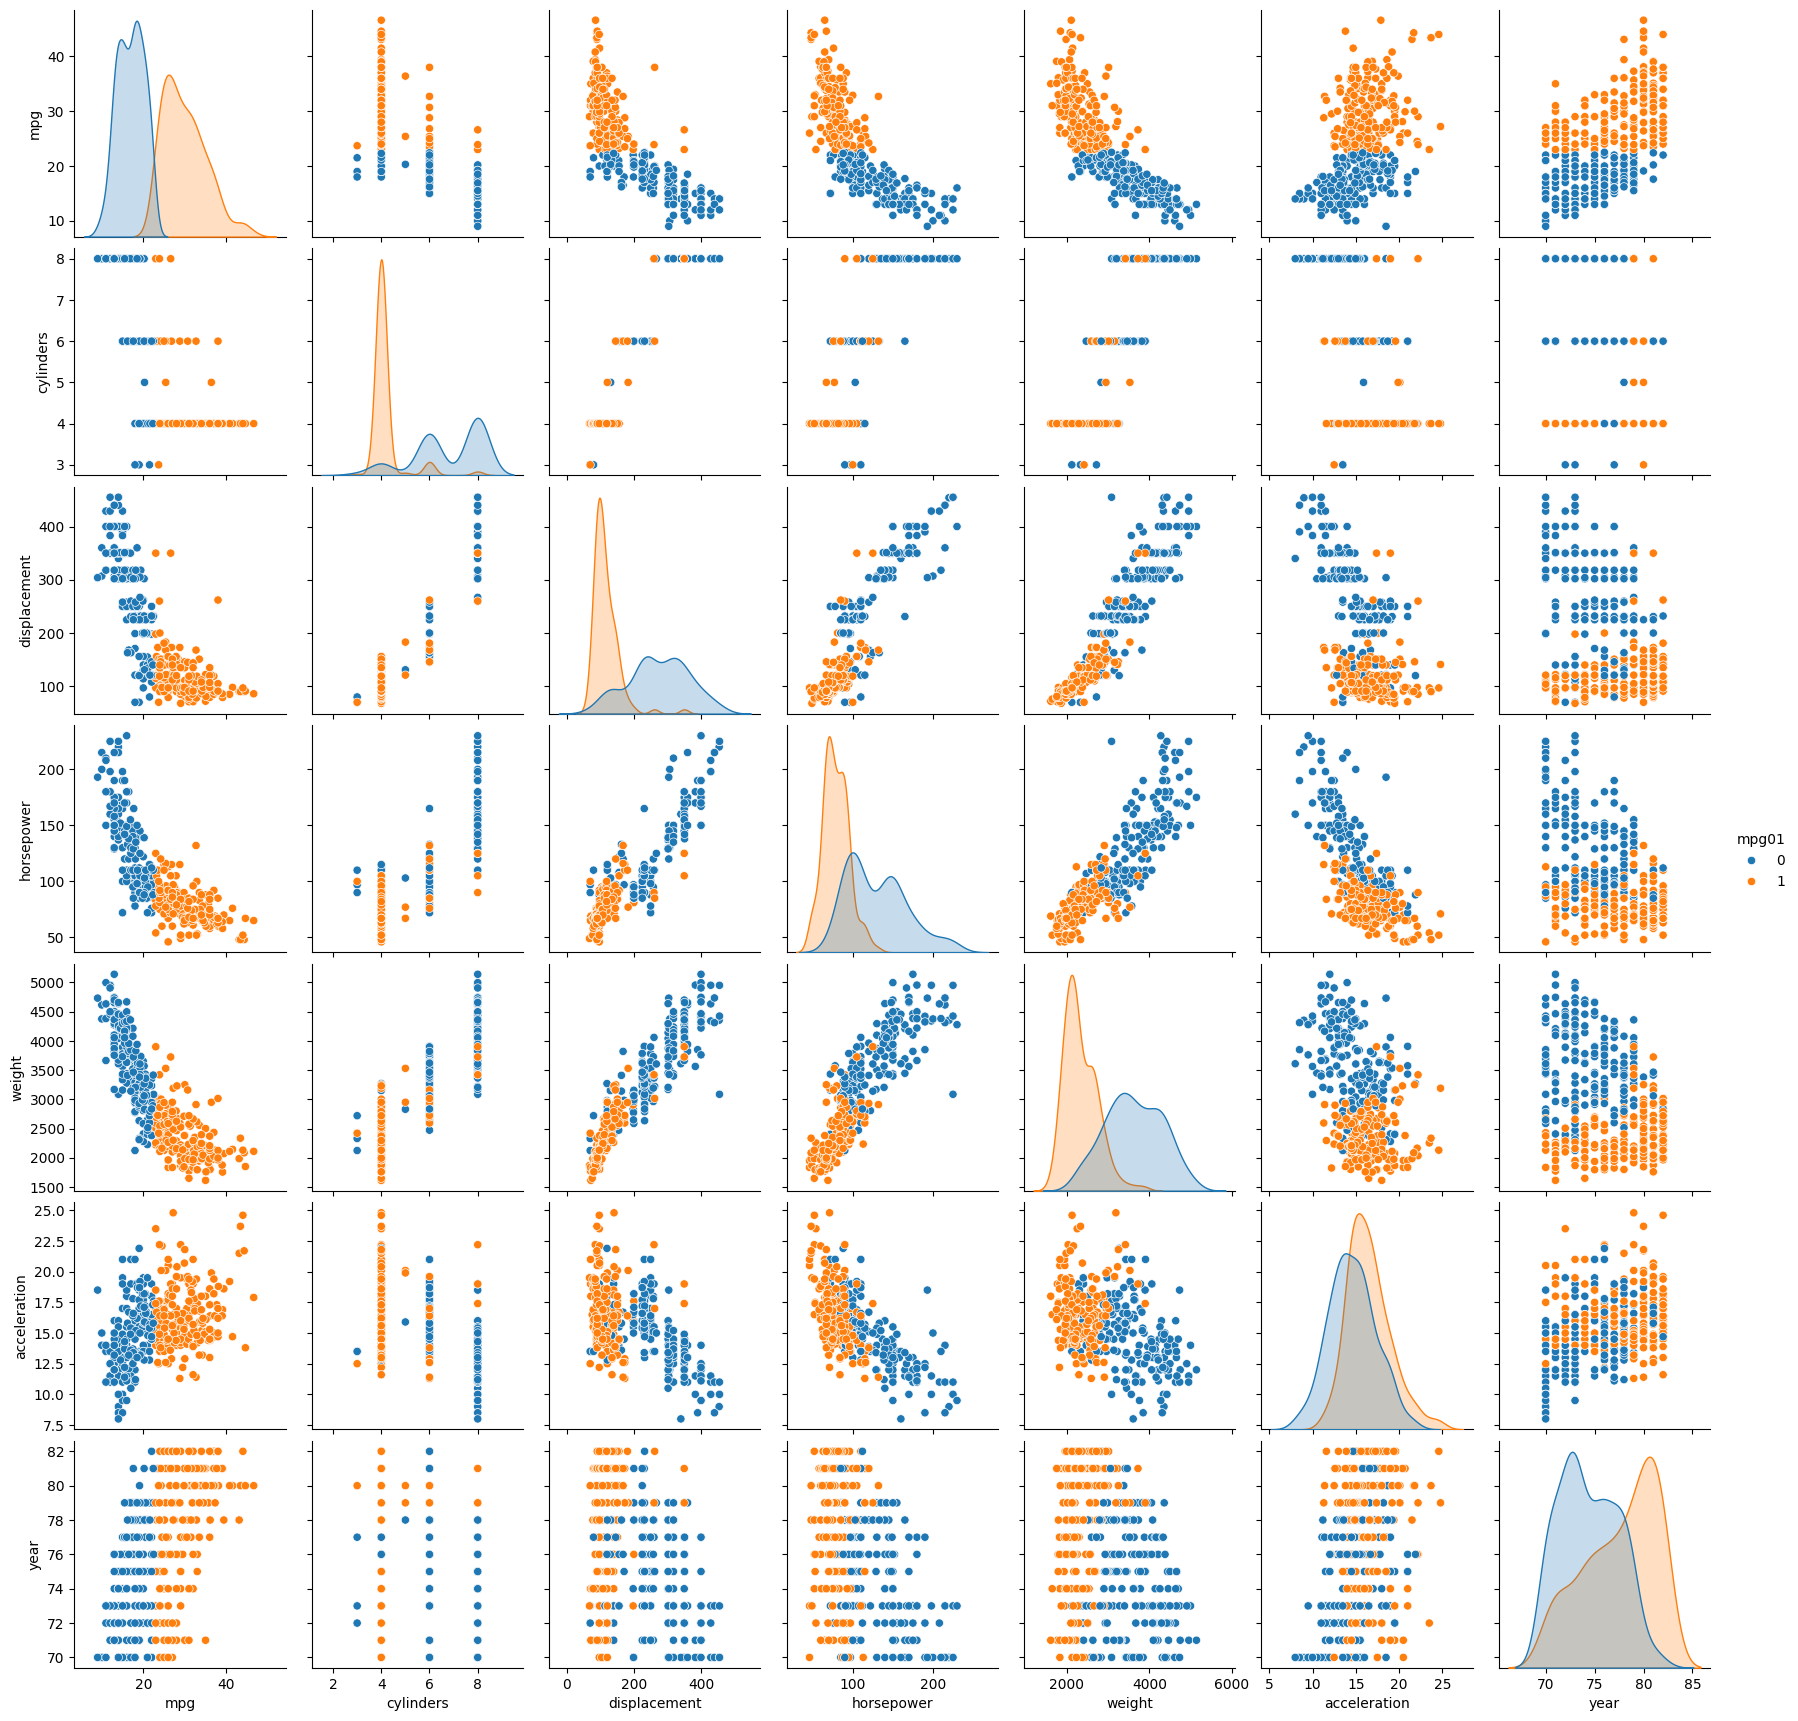

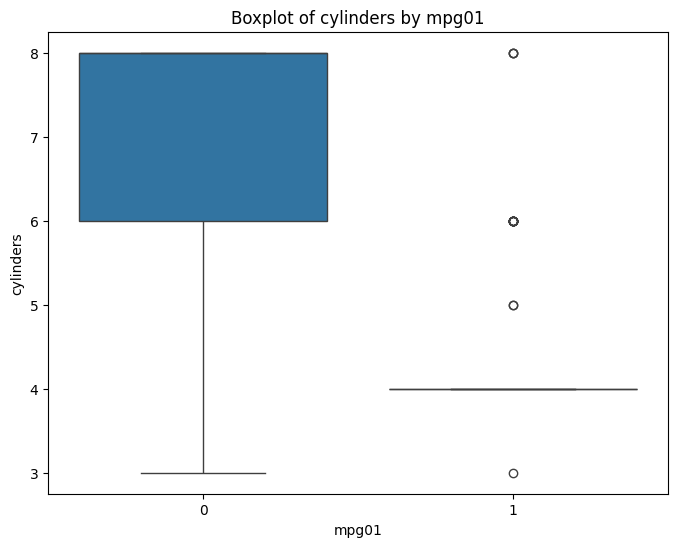

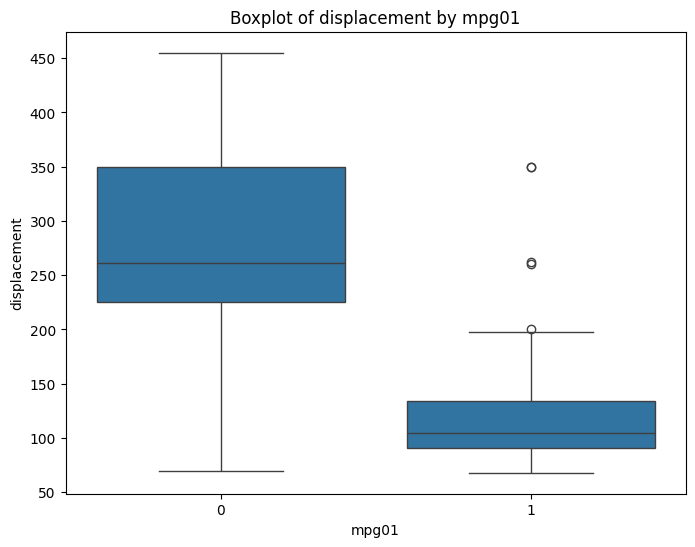

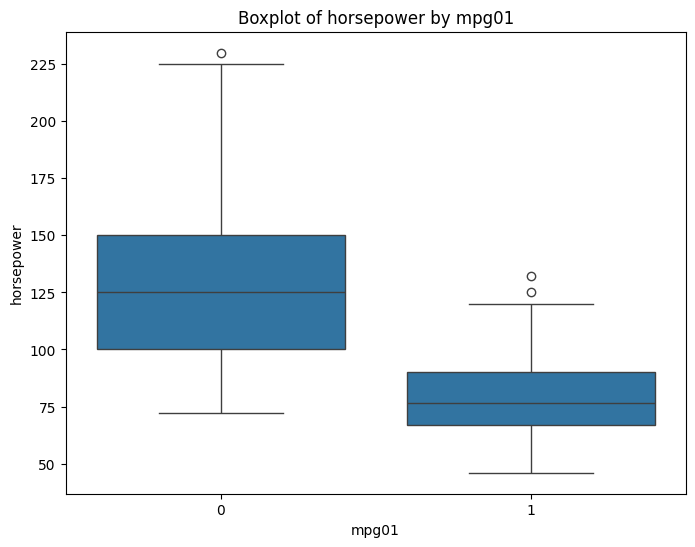

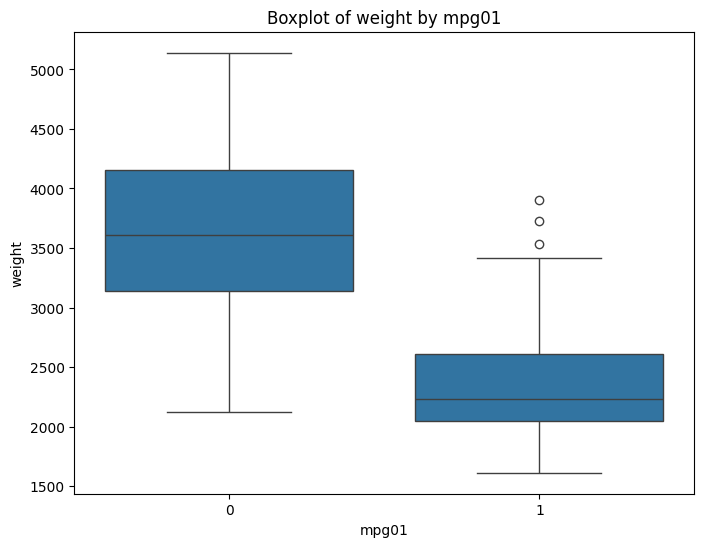

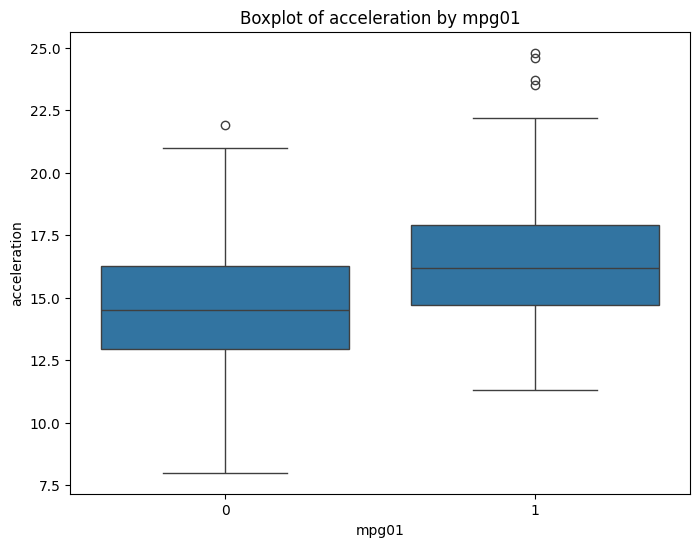

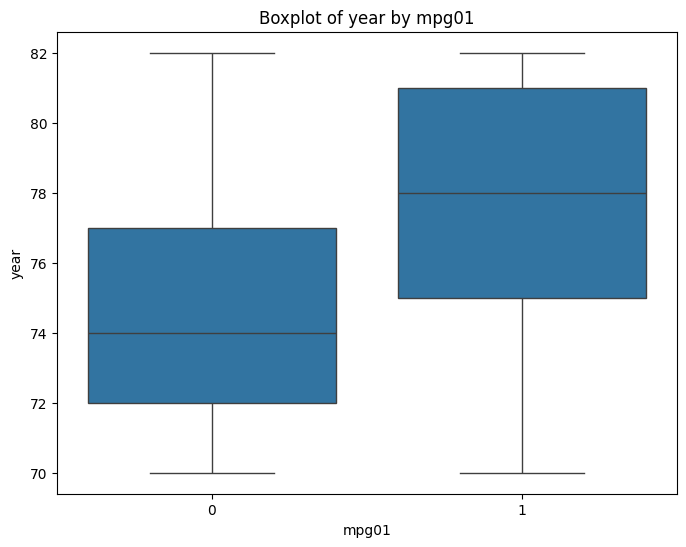

In [ ]:

# (b) Explore the data graphically
# Let's plot boxplots and scatterplots to explore the relationships
sns.pairplot(Auto, vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'], hue='mpg01')
plt.show()

# We will also create boxplots to show the distribution of mpg01 for different features
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='mpg01', y=feature, data=Auto)
    plt.title(f'Boxplot of {feature} by mpg01')
    plt.show()

In [34]:
# (c) Split the data into training and test sets
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]  # The selected features
y = Auto['mpg01']  # Target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# (d) Perform LDA and calculate test error
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
lda_test_error = 1 - accuracy_score(y_test, y_pred_lda)
print(f'LDA Test Error: {lda_test_error:.4f}')

LDA Test Error: 0.1271


In [36]:
# (e) Perform QDA and calculate test error
qda = QDA()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
qda_test_error = 1 - accuracy_score(y_test, y_pred_qda)
print(f'QDA Test Error: {qda_test_error:.4f}')

QDA Test Error: 0.1186


In [37]:
# (f) Perform Logistic Regression and calculate test error
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_test_error = 1 - accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Test Error: {logreg_test_error:.4f}')

Logistic Regression Test Error: 0.1271


In [38]:
# (g) Perform Naive Bayes and calculate test error
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_test_error = 1 - accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Test Error: {nb_test_error:.4f}')

Naive Bayes Test Error: 0.1271


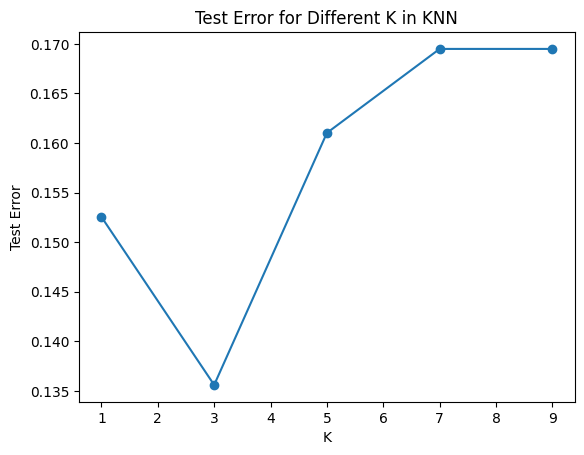

Best K: 3 with Test Error: 0.1356


In [39]:
# (h) Perform KNN with several values of K
knn_errors = []
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_errors.append(1 - accuracy_score(y_test, y_pred_knn))

# Plot KNN errors for different K values
plt.plot(k_values, knn_errors, marker='o')
plt.title('Test Error for Different K in KNN')
plt.xlabel('K')
plt.ylabel('Test Error')
plt.show()

# Print best K and its corresponding test error
best_k = k_values[np.argmin(knn_errors)]
best_knn_error = min(knn_errors)
print(f'Best K: {best_k} with Test Error: {best_knn_error:.4f}')
